<center><h1>COLORSPACES</h1></center>

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd '/gdrive/My Drive/Colab Notebooks/image/colorspaces'

/gdrive/My Drive/Colab Notebooks/image/colorspaces


In [5]:
%ls

'32 - A Standardized Workflow for Illumination-Invariant Image Extraction.pdf'
'33 - Texture-Consistent Shadow Removal.pdf'
'55 - On the Removal of Shadows From Images.pdf'
 colorspace.ipynb
'Colour Constancy from Both Sides of the Shadow Edge.pdf'
'Detecting ground shadows in outdoor consumer photographs.pdf'
 image_0000.pcd
 IMG_7083.JPG
'New spectrum ratio properties and features for shadow detection.pdf'
 NRN-ICCV03.pdf
 old/
 raw.ipynb
'Recovery of Chromaticity Image Free from Shadows via Illumination Invariance.ipynb'
'Recovery of Chromaticity Image Free from Shadows via Illumination Invariance.pdf'
 sample.png
'Shadow Detection based on Colour Segmentation and Estimated Illumination.pdf'
'Simple Shadow Removal.pdf'


In [6]:
filename='sample.png'

In [7]:
from PIL import Image

img  = Image.open(filename)

In [8]:
from skimage import io

img = io.imread(filename)

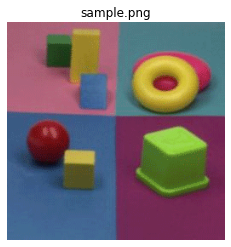

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(filename)
plt.axis('off')
plt.show()

resize to manageable dimensions

In [10]:
import numpy as np
from skimage.transform import resize

(width, height) = (img.shape[0], img.shape[1])
RGB=img
maxdim=height
if width > height:
    maxdim=width
if maxdim > 320:
    (width, height) = ((320 * width) // maxdim, (320 * height) // maxdim)
    img = resize(img,(width, height),anti_aliasing=True)
print("size: {} pixels".format(width*height))
RGB.shape

size: 65536 pixels


(256, 256, 3)

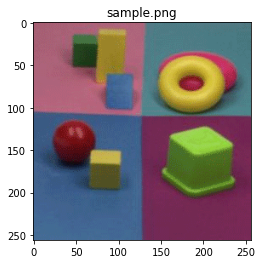

In [11]:
import matplotlib.pyplot as plt

plt.imshow(RGB)
plt.title(filename)
plt.show()

## RGB

In [12]:
import matplotlib as mp
cmap_br = mp.colors.LinearSegmentedColormap.from_list("", ["black","red"])
cmap_bb = mp.colors.LinearSegmentedColormap.from_list("", ["black","blue"])
cmap_bg = mp.colors.LinearSegmentedColormap.from_list("", ["black","green"])

https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857
https://qed0711.github.io/plot-planner/

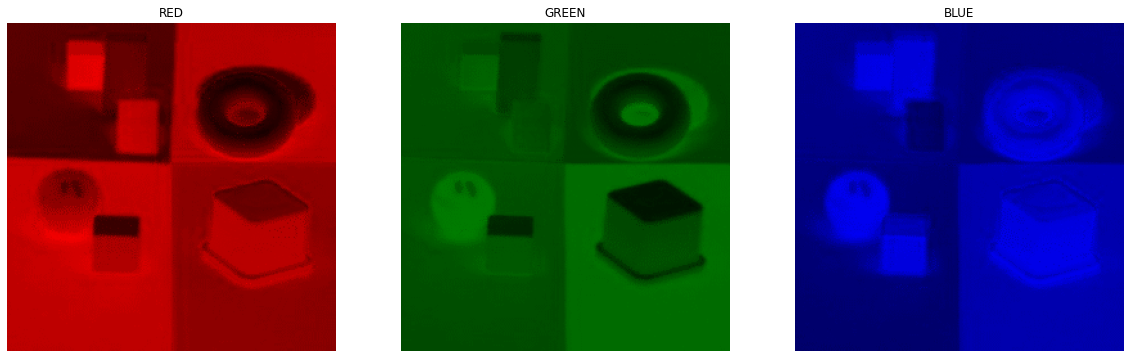

In [13]:
fig = plt.figure(figsize=(20,20))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(RGB[:,:,0]*255, cmap=cmap_br, vmin=0, vmax=255)
ax1.title.set_text("RED")
ax1.axis('off')
ax2.imshow(RGB[:,:,1]*255, cmap=cmap_bg, vmin=0, vmax=255)
ax2.title.set_text("GREEN")
ax2.axis('off')
ax3.imshow(RGB[:,:,2]*255, cmap=cmap_bb, vmin=0, vmax=255)
ax3.title.set_text("BLUE")
ax3.axis('off')
plt.show()

In [14]:
%pip install pyntcloud

     |████████████████████████████████| 346 kB 5.3 MB/s 


In [15]:
import pandas as pd
from pyntcloud import PyntCloud

def plotSpace(LAB,RGB,axes={}):
    (width, height,_) = RGB.shape
    RGB_=np.reshape(RGB,[width*height,3]).astype(np.int32)
    LAB_=np.reshape(LAB,[width*height,3]).astype(np.int32) 
    LABRGB_=np.hstack((LAB_,RGB_))
    
    points = pd.DataFrame(np.array(LABRGB_),columns=['x','y','z','red','green','blue'])
    cloud = PyntCloud(points)
    cloud.plot(elev=10.,azim=75.,initial_point_size=1,polylines=axes)

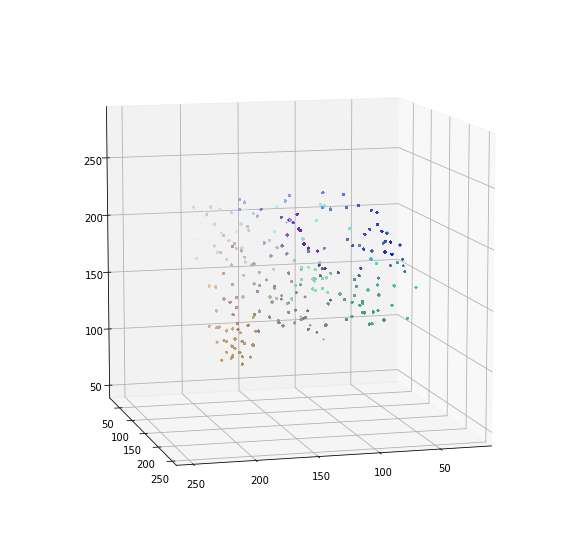

In [16]:
axes= [{"color": "red","vertices": [[0, 0, 0], [256, 0, 0]] },
       {"color": "green","vertices": [[0, 0, 0], [0, 256, 0]] },
       {"color": "blue","vertices": [[0, 0, 0], [0, 0, 256]] },
]
plotSpace(RGB*255,RGB*255,axes)

## CIE Lab

In [17]:
from skimage.color import rgb2lab

LAB = rgb2lab(RGB)

In [18]:
import matplotlib as mp
cmap_gr = mp.colors.LinearSegmentedColormap.from_list("", ["red","green"])
cmap_vy = mp.colors.LinearSegmentedColormap.from_list("", ["yellow","blue"])

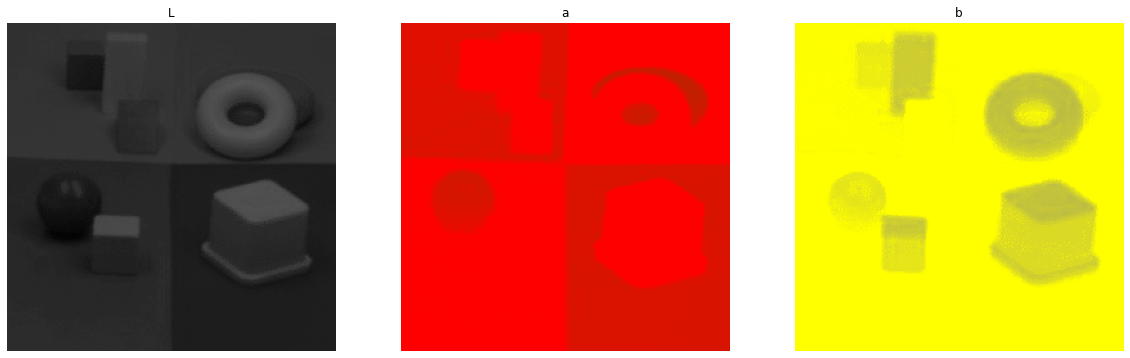

In [19]:
fig = plt.figure(figsize=(20,20))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(LAB[:,:,0], cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.title.set_text("L")
ax2.imshow(LAB[:,:,1], cmap=cmap_gr, vmin=0, vmax=255)
ax2.axis('off')
ax2.title.set_text("a")
ax3.imshow(LAB[:,:,2], cmap=cmap_vy, vmin=0, vmax=255)
ax3.axis('off')
ax3.title.set_text("b")
plt.show()

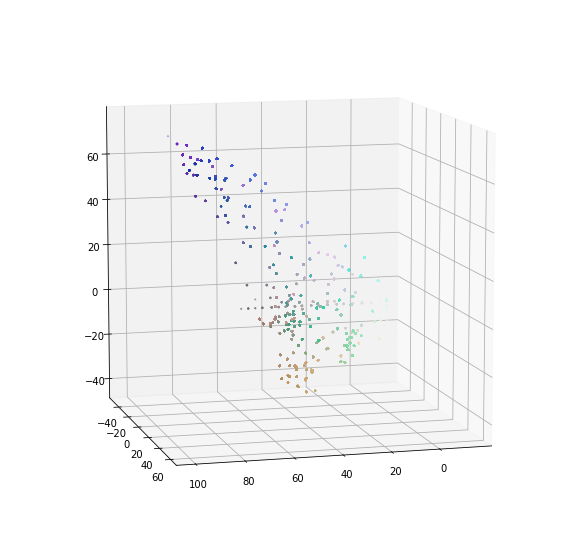

In [20]:
axes= [{"color": "white","vertices": [[0, 0, 0], [256, 0, 0]] },
       {"color": "red","vertices": [[0, 0, 0], [0, 256, 0]] },
       {"color": "yellow","vertices": [[0, 0, 0], [0, 0, 256]] },
]
plotSpace(LAB,RGB*255,axes)

## normalized RGB

In [21]:
def convert_rgb2nrgb(RGB,epsilon=np.finfo(float).eps):
    X=RGB.astype(np.float)
    N=X[:,:,0]+X[:,:,1]+X[:,:,2]
    N[N<=0.0]=1.0
    nRGB=X/np.stack((N,N,N),axis=2)
    return nRGB

In [22]:
nRGB=convert_rgb2nrgb(RGB)

In [23]:
import matplotlib as mp
cmap_br = mp.colors.LinearSegmentedColormap.from_list("", ["black","red"])
cmap_bb = mp.colors.LinearSegmentedColormap.from_list("", ["black","blue"])
cmap_bg = mp.colors.LinearSegmentedColormap.from_list("", ["black","green"])

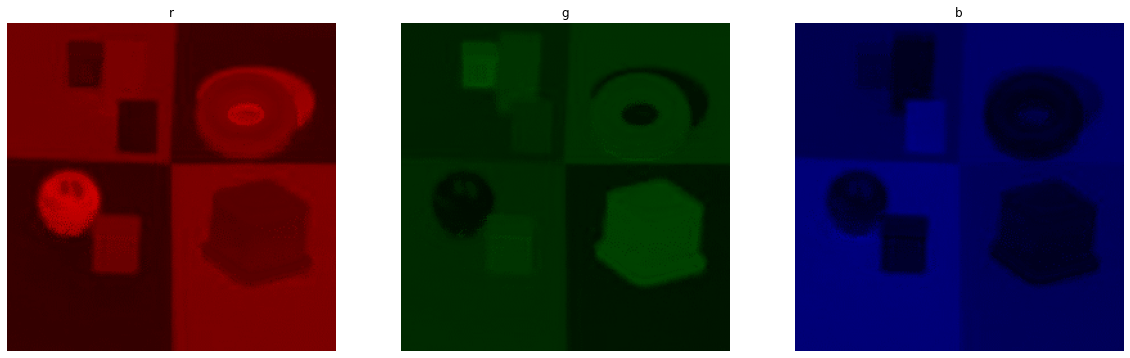

In [24]:
fig = plt.figure(figsize=(20,20))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(255*nRGB[:,:,0], cmap=cmap_br, vmin=0, vmax=255)
ax1.axis('off')
ax1.title.set_text("r")
ax2.imshow(255*nRGB[:,:,1], cmap=cmap_bg, vmin=0, vmax=255)
ax2.axis('off')
ax2.title.set_text("g")
ax3.imshow(255*nRGB[:,:,2], cmap=cmap_bb, vmin=0, vmax=255)
ax3.axis('off')
ax3.title.set_text("b")
plt.show()

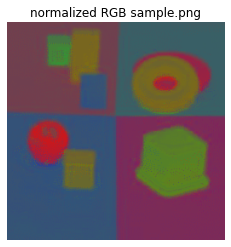

In [25]:
import matplotlib.pyplot as plt

plt.imshow(nRGB)
plt.title("normalized RGB {}".format(filename))
plt.axis('off')
plt.show()

## GCM - Gaussian Color Model

In [26]:
def convert_rgb2gcm(RGB,epsilon=np.finfo(float).eps):
    rgbdtype=RGB.dtype
    (width, height,_) = RGB.shape
    RGB_=np.reshape(RGB,[width*height,3]).astype(np.float)
    RGB_to_EElEll=np.mat('[0.06  0.3  0.34 ; 0.63  0.04 -0.6; 0.27 -0.35 0.17]')
    GCM_=np.array((RGB_*RGB_to_EElEll).astype(rgbdtype))
    return np.reshape(GCM_,RGB.shape)

In [27]:
def scale1(img):
    """normalize [-1,1] array to values between 0.0 and 1.0"""
    return (img+1.0)/2.0

In [28]:
GCM=convert_rgb2gcm(RGB)

In [29]:
RGB.dtype

dtype('uint8')

In [30]:
np.min(RGB[:,:,0]),np.max(RGB[:,:,0])

(9, 232)

In [31]:
np.min(GCM[:,:,0]),np.max(GCM[:,:,0])

(10, 173)

In [32]:
np.min(GCM[:,:,1]),np.max(GCM[:,:,1])

(0, 255)

In [33]:
np.min(GCM[:,:,2]),np.max(GCM[:,:,2])

(0, 255)

In [34]:
def normalize256(ain):
    tmp=ain.copy()
    min_=np.amin(tmp)
    if min_<0 :
        tmp=tmp-min_
    max_=np.amax(tmp)
    #if max_>256 :
    tmp=tmp/(max_/256.)
    return tmp.astype(np.uint8)

In [35]:
def scale256(img):
    """normalize [-1,1] array to values between 0 and 256"""
    tmp=((img+1.0)/2.0)*256
    return tmp.astype(np.uint8)

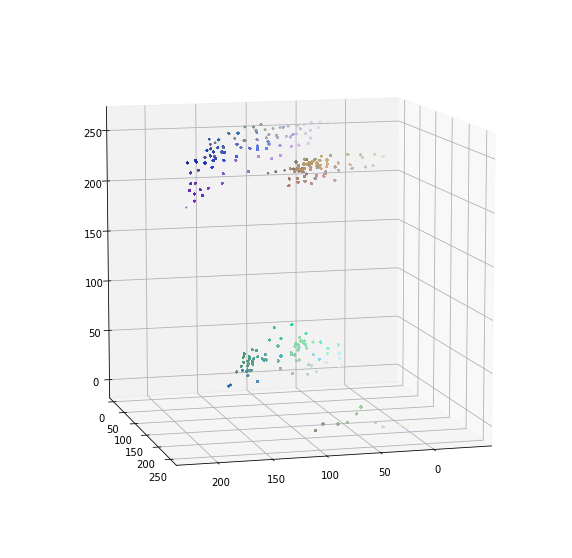

In [36]:
axes= [{"color": "white","vertices": [[0, 0, 0], [256, 0, 0]] },
       {"color": "green","vertices": [[0, 0, 0], [0, 256, 0]] },
       {"color": "blue","vertices": [[0, 0, 0], [0, 0, 256]] },
]
plotSpace(GCM,RGB*255,axes)

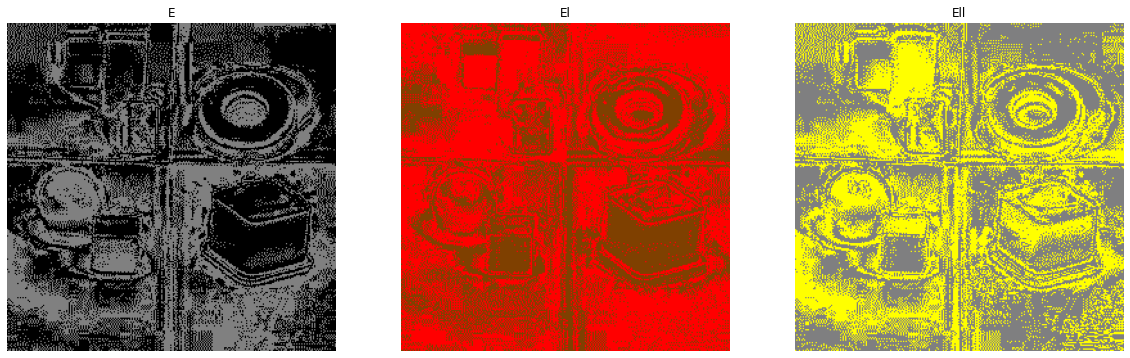

In [37]:
fig = plt.figure(figsize=(20,20))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(scale256(GCM[:,:,0]), cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.title.set_text("E")
ax2.imshow(scale256(GCM[:,:,1]), cmap=cmap_gr, vmin=0, vmax=255)
ax2.axis('off')
ax2.title.set_text("El")
ax3.imshow(scale256(GCM[:,:,2]), cmap=cmap_vy, vmin=0, vmax=255)
ax3.axis('off')
ax3.title.set_text("Ell")
plt.show()

# INVARIANTS

### derivatives in the gaussian color model

In [38]:
from scipy.ndimage import filters

sigma=2
epsilon=np.finfo(float).eps

In [39]:
def dx(RGB,kernel=(sigma,sigma)):
    if len(RGB.shape)==3:
        dRdx=filters.gaussian_filter(RGB[:,:,0].astype(np.float32), kernel, (1,0))
        dGdx=filters.gaussian_filter(RGB[:,:,1].astype(np.float32), kernel, (1,0))
        dBdx=filters.gaussian_filter(RGB[:,:,2].astype(np.float32), kernel, (1,0))
        dRGBdx=np.stack((dRdx,dGdx,dBdx),axis=2)
        return dRGBdx
    else:
        return filters.gaussian_filter(RGB[:,:].astype(np.float32), kernel, (1,0))

In [40]:
def dy(RGB,kernel=(sigma,sigma)):
    if len(RGB.shape)==3:
        dRdy=filters.gaussian_filter(RGB[:,:,0].astype(np.float32), kernel, (0,1))
        dGdy=filters.gaussian_filter(RGB[:,:,0].astype(np.float32), kernel, (0,1))
        dBdy=filters.gaussian_filter(RGB[:,:,0].astype(np.float32), kernel, (0,1))
        dRGBdy=np.stack((dRdy,dGdy,dBdy),axis=2)
        return dRGBdy
    else:
        return filters.gaussian_filter(RGB[:,:].astype(np.float32), kernel, (0,1))

In [41]:
def channelEdge(GCMdx,GCMdy,channel=0):
    if len(GCMdx.shape)==3:
        Edx2=np.square(GCMdx[:,:,channel])
        Edy2=np.square(GCMdy[:,:,channel])
        return np.sqrt(Edx2+Edy2)
    else:
        Edx2=np.square(GCMdx[:,:])
        Edy2=np.square(GCMdy[:,:])
        return np.sqrt(Edx2+Edy2)

In [42]:
GCMdx=dx(GCM)
GCMdy=dy(GCM)

In [43]:
def allChannelsEdge(GCMdx,GCMdy):
    return np.sqrt(np.sum(np.square(GCMdx)+np.square(GCMdy),axis=2))

In [44]:
GCMdw=allChannelsEdge(GCMdx,GCMdy)

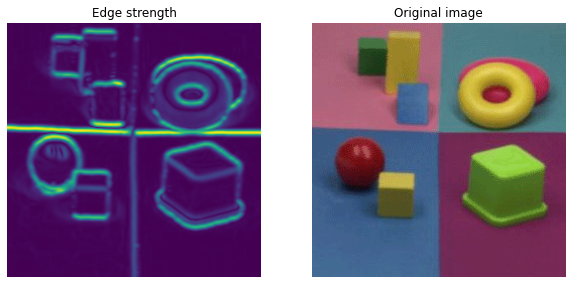

In [45]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.imshow(GCMdw)
ax1.axis('off')
ax1.title.set_text("Edge strength")
ax2.imshow(RGB)
ax2.axis('off')
ax2.title.set_text("Original image")
plt.show()

### differential invariants for Lambertian Reflexion Model

In [46]:
C=np.zeros(GCM.shape)
C[:,:,1]=GCM[:,:,1].astype(np.float)/(GCM[:,:,0].astype(np.float)+epsilon) # first invariant
C[:,:,2]=GCM[:,:,2].astype(np.float)/(GCM[:,:,0].astype(np.float)+epsilon) # second invariant
C[:,:,0]=epsilon                 # !! not an invariant

In [47]:
np.min(C[:,:,0]),np.max(C[:,:,0])

(2.220446049250313e-16, 2.220446049250313e-16)

In [48]:
np.min(C[:,:,1]),np.max(C[:,:,1])

(0.0, 20.916666666666668)

In [49]:
np.min(C[:,:,2]),np.max(C[:,:,2])

(0.0, 17.0)

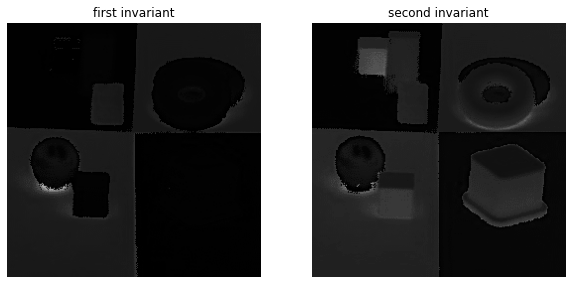

In [50]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.imshow(normalize256(C[:,:,1]), cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.title.set_text("first invariant")
ax2.imshow(normalize256(C[:,:,2]), cmap='gray', vmin=0, vmax=255)
ax2.axis('off')
ax2.title.set_text("second invariant")
plt.show()

differential invariants

In [51]:
Cdx=dx(C)
Cdy=dy(C)

In [52]:
Cld=channelEdge(Cdx,Cdy,1)
Clld=channelEdge(Cdx,Cdy,2)

In [53]:
Ew=allChannelsEdge(Cdx,Cdy)

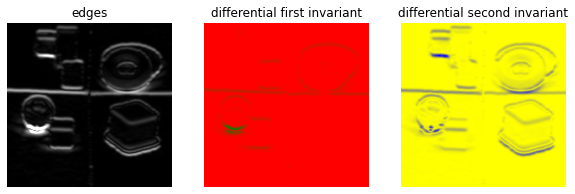

In [54]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(256*Ew, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text("edges")
ax1.axis('off')
ax2.imshow(normalize256(Cld), cmap=cmap_gr, vmin=0, vmax=255)
ax2.title.set_text("differential first invariant")
ax2.axis('off')
ax3.imshow(normalize256(Clld), cmap=cmap_vy, vmin=0, vmax=255)
ax3.title.set_text("differential second invariant")
ax3.axis('off')
plt.show()

## differential invariants for Dichromatic Reflexion Model

'hue'

In [55]:
import math

H=np.arctan2(GCM[:,:,1],GCM[:,:,2])*128.0/math.pi
H[H<0]=H[H<0]+256.0

'saturation'

In [56]:
S=255*np.divide(np.sqrt(np.square(GCM[:,:,1])+np.square(GCM[:,:,2])),GCM[:,:,0]+epsilon)

hue edges

In [57]:
Hdx=dx(H)
Hdy=dy(H)
Hw=channelEdge(Hdx,Hdy)

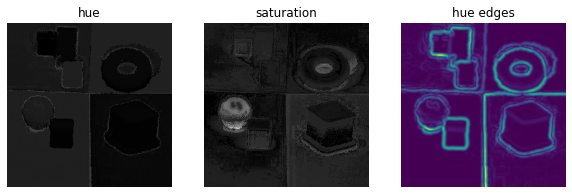

In [68]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(H.astype(np.float), cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.title.set_text("hue")
ax2.imshow(S.astype(np.float), cmap='gray', vmin=0, vmax=255)
ax2.axis('off')
ax2.title.set_text("saturation")
ax3.imshow(Hw.astype(np.float))
ax3.axis('off')
ax3.title.set_text("hue edges")
plt.show()

## QUASI-INVARIANTS

spatial derivative x,y

In [69]:
dRGBdx=dx(RGB)
dRGBdy=dy(RGB)

color edge 

In [70]:
Cw=allChannelsEdge(dRGBdx,dRGBdy)

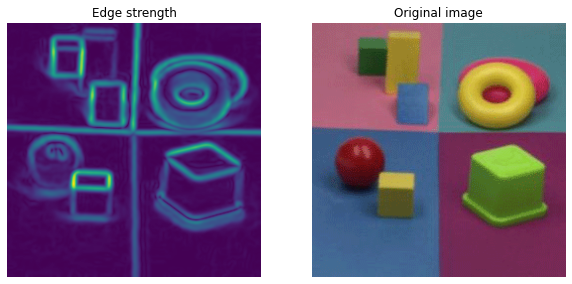

In [71]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)
ax1.imshow(Cw)
ax1.axis('off')
ax1.title.set_text("Edge strength")
ax2.imshow(RGB)
ax2.axis('off')
ax2.title.set_text("Original image")
plt.show()

### shadow/shading

shadow shading direction (unit RGB vectors)

In [72]:
def shadowDirection(RGB,epsilon=np.finfo(float).eps):
    N=np.sqrt(np.sum(np.square(RGB.astype(np.float)),axis=2))
    N[N<=0.0]=epsilon
    F1=RGB/np.stack((N,N,N), axis=2)
    return F1

In [73]:
F1=shadowDirection(RGB)

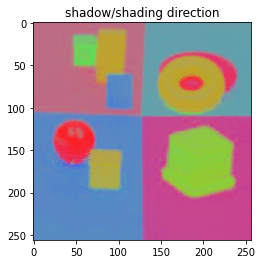

In [74]:
import matplotlib.pyplot as plt

plt.imshow(F1)
plt.title('shadow/shading direction')
plt.show()

project spatial derivatives on the shadow/shading direction

In [75]:
def projectSpatialDerivative(dRGBdx,F1):
    (width,height,_)=dRGBdx.shape   
    F1_=F1.reshape((width*height,3))
    dRGBdx_=dRGBdx.reshape((width*height,3))
    PdRGBdx_=np.sum(dRGBdx_*F1_, axis=1)                         # project dRGBdx on F1 
    VPdRGBdx_=np.stack((PdRGBdx_,PdRGBdx_,PdRGBdx_), axis=1)*F1_ # direction
    PdRGBdx=PdRGBdx_.reshape((width,height))                     # projection as image L
    VPdRGBdx=VPdRGBdx_.reshape((width,height,3))                 # vector as RGB image
    return VPdRGBdx,PdRGBdx

compute variant and invariant edges

In [76]:
def computeQuasiVariantInvariant(dRGBdx,dRGBdy,F1):
    VPdRGBdx,PdRGBdx=projectSpatialDerivative(dRGBdx,F1)
    VPdRGBdy,PdRGBdy=projectSpatialDerivative(dRGBdy,F1)
    Ew=np.sqrt(np.sum(np.square(VPdRGBdx)+np.square(VPdRGBdy),axis=2))
    Iw=np.sqrt(np.sum(np.square(dRGBdx-VPdRGBdx)+np.square(dRGBdy-VPdRGBdy),axis=2))
    return Ew,Iw

In [77]:
Ew,Iw=computeQuasiVariantInvariant(dRGBdx,dRGBdy,F1)

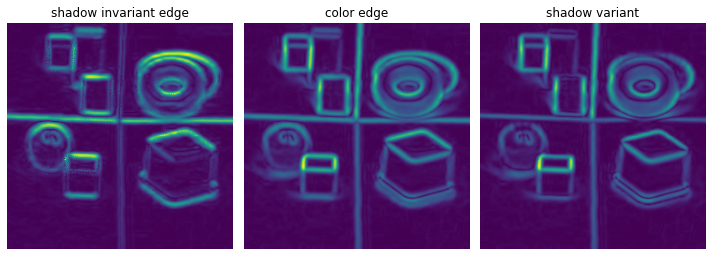

In [78]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(Iw)
ax1.axis('off')
ax1.title.set_text("shadow invariant edge")
ax2.imshow(Cw)
ax2.axis('off')
ax2.title.set_text("color edge")
ax3.imshow(Ew)
ax3.axis('off')
ax3.title.set_text("shadow variant")

fig.tight_layout()
plt.show()

### specularity

In [79]:
def specularityDirection(RGB,epsilon=np.finfo(float).eps):
    B1=np.ones(RGB.shape)/math.sqrt(3) # assuming white light
    return B1

In [80]:
B1=specularityDirection(RGB)

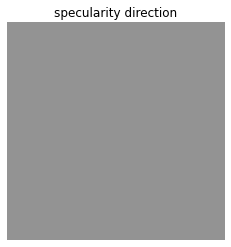

In [81]:
import matplotlib.pyplot as plt

plt.imshow(B1)
plt.title('specularity direction')
plt.axis('off')
plt.show()

In [82]:
Ew,Iw=computeQuasiVariantInvariant(dRGBdx,dRGBdy,B1)

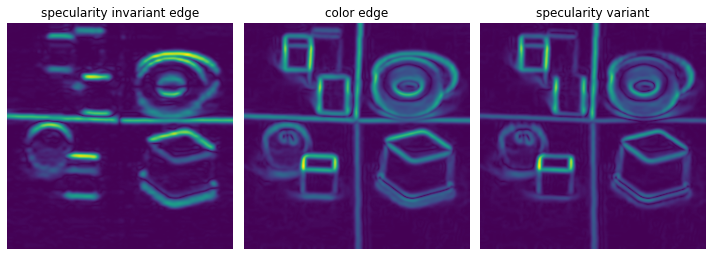

In [83]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(Iw)
ax1.axis('off')
ax1.title.set_text("specularity invariant edge")
ax2.imshow(Cw)
ax2.axis('off')
ax2.title.set_text("color edge")
ax3.imshow(Ew)
ax3.axis('off')
ax3.title.set_text("specularity variant")

fig.tight_layout()
plt.show()

### material (hue)

cross product

In [84]:
def materialDirection(F1,B1,epsilon=np.finfo(float).eps):
    M=np.cross(F1, B1, axisa=2, axisb=2)
    NM=np.sqrt(np.sum(np.square(M),axis=2))
    NM[NM<=0]=epsilon
    M1=M/np.stack((NM,NM,NM), axis=2)
    return M1

In [85]:
M1=materialDirection(F1,B1)

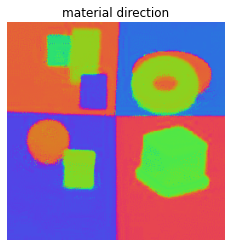

In [92]:
import matplotlib.pyplot as plt

plt.imshow(M1[...,[2,0,1]]/2+0.5)
plt.title('material direction')
plt.axis('off')
plt.show()

project spatial derivatives on the material direction

In [93]:
Ew,Iw=computeQuasiVariantInvariant(dRGBdx,dRGBdy,M1)

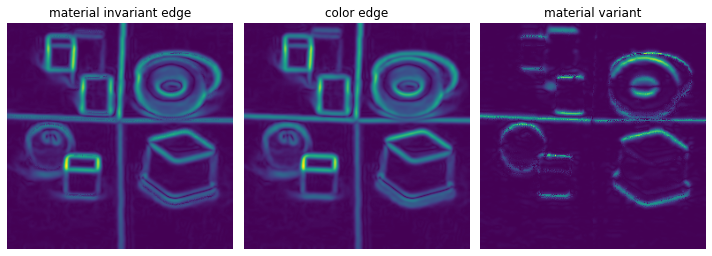

In [94]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)
ax1.imshow(Iw)
ax1.axis('off')
ax1.title.set_text("material invariant edge")
ax2.imshow(Cw)
ax2.axis('off')
ax2.title.set_text("color edge")
ax3.imshow(Ew)
ax3.axis('off')
ax3.title.set_text("material variant")

fig.tight_layout()
plt.show()

In [95]:
def quasiInvariants(RGB,kernel=(sigma,sigma)):
    # spatial derivatives
    dRGBdx=dx(RGB,kernel)
    dRGBdy=dy(RGB,kernel)
    # color edges
    E=np.sqrt(np.sum(np.square(dRGBdx)+np.square(dRGBdy),axis=2))
    # shadow,specularity and material directions
    SSd=shadowDirection(RGB)
    SPd=specularityDirection(RGB)
    Md=materialDirection(F1,B1)
    # shadow,specularity and material variant & invariant edges
    SSv,SSi=computeQuasiVariantInvariant(dRGBdx,dRGBdy,SSd)
    SPv,SPi=computeQuasiVariantInvariant(dRGBdx,dRGBdy,SPd)
    Mv,Mi=computeQuasiVariantInvariant(dRGBdx,dRGBdy,Md)
    return (SSi.astype(RGB.dtype),SPi.astype(RGB.dtype),Mi.astype(RGB.dtype)), \
           (SSv.astype(RGB.dtype),SPv.astype(RGB.dtype),Mv.astype(RGB.dtype)), \
           (E.astype(RGB.dtype),dRGBdx.astype(RGB.dtype),dRGBdy.astype(RGB.dtype))

In [96]:
(SSi,SPi,Mi),(SSv,SPv,Mv),(E,dRGBdx,dRGBdy)=quasiInvariants(RGB,kernel=(sigma,sigma))

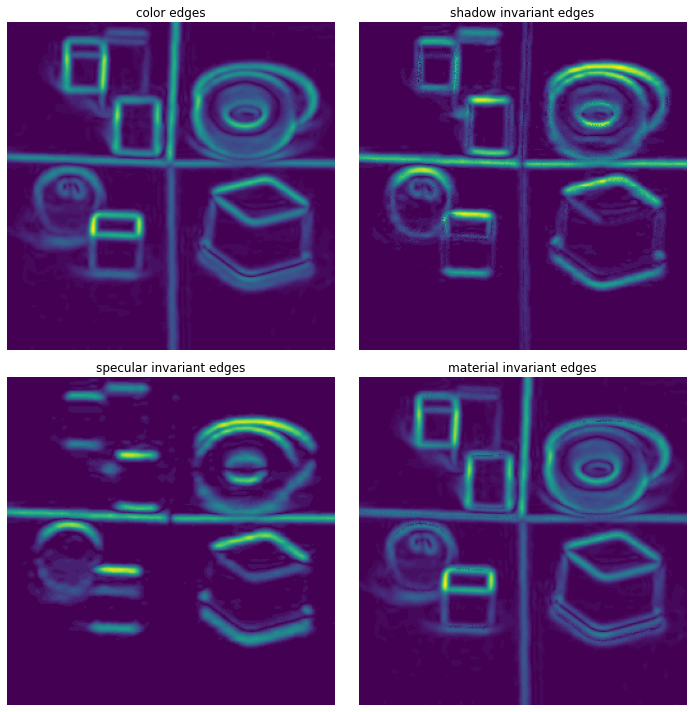

In [97]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(2, 2, 1)
ax2=fig.add_subplot(2, 2, 2)
ax3=fig.add_subplot(2, 2, 3)
ax4=fig.add_subplot(2, 2, 4)
ax1.imshow(E)
ax1.axis('off')
ax1.title.set_text("color edges")
ax2.imshow(SSi)
ax2.axis('off')
ax2.title.set_text("shadow invariant edges")
ax3.imshow(SPi)
ax3.axis('off')
ax3.title.set_text("specular invariant edges")
ax4.imshow(Mi)
ax4.axis('off')
ax4.title.set_text("material invariant edges")
fig.tight_layout()
plt.show()

In [98]:
C=np.stack((SSi,SPi,Mi),axis=2)

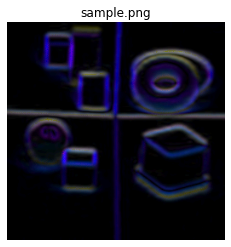

In [99]:
import matplotlib.pyplot as plt

plt.imshow(C/np.amax(C))
plt.title(filename)
plt.axis('off')
plt.show()

In [ ]:
import cv2
cv2.imwrite('outn.png',255*(C/np.amax(C)))

True

In [ ]:
import cv2
cv2.imwrite('out.png',255*C)

True

In [100]:
!pwd

/gdrive/My Drive/Colab Notebooks/image/colorspaces
